In [16]:
!pip3 list

Package             Version
------------------- -----------
altgraph            0.17.2
appnope             0.1.4
asttokens           2.4.1
beautifulsoup4      4.12.3
blinker             1.7.0
certifi             2024.2.2
charset-normalizer  3.3.2
click               8.1.7
comm                0.2.1
contourpy           1.2.0
cycler              0.12.1
debugpy             1.8.1
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
filelock            3.13.1
Flask               3.0.2
fonttools           4.49.0
fsspec              2024.2.0
future              0.18.2
idna                3.6
importlib-metadata  7.0.1
importlib_resources 6.1.2
ipykernel           6.29.3
ipython             8.18.1
itsdangerous        2.1.2
jedi                0.19.1
Jinja2              3.1.3
joblib              1.3.2
jupyter_client      8.6.0
jupyter_core        5.7.1
kiwisolver          1.4.5
macholib            1.15.2
MarkupSafe          2.1.5
matplotlib          3.8.3
matplotlib-inlin

>## Machine Learning 기본 프로세스
1. Hypothesis 설정 -> 데이터를 가장 잘 표현할 수 있는 함수 H(x) 설정
2. Cost Function 설정 -> Hypothesis의 결과와 label간의 차이를 평가할 수 있는 함수 설정
3. Learning Algorithm 설계 -> <b>Cost가 최소가 되도록 H(x)의 파라미터를 조정하는 것</b>

>### Perceptron
>>##### Single Perceptron 구성
 - Activation Function = Step f, Sigmoid, ReLU 등, sum(wx+b)을 입력받아 정해진 출력을 내보내는 함수

$S=X\cdot W + b= \begin{bmatrix}x_{1}&x_{2}&x_{3}\end{bmatrix}\begin{bmatrix}w_{1}\\w_{2}\\w_{3}\end{bmatrix} + b = x_{1}w_{1} + x_{2}w_{2} + x_{3}w_{3} + b $

In [17]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
W = np.array([4, 5, 6, 7, 8])
B = 3

print(X*W) # 각자의 원소끼리 곱해짐
print(np.sum(W*X) + B) # 각자의 원소끼리 곱한 후 모두 더해짐
print(np.matmul(W, X) + B)



[ 4 10 18 28 40]
103
103


>### Linear Regression
- Activation func "f(x)=x" 사용... H(x) = wx + b
> Cost Function : Mean Squared Error (MSE)
> $(1/m)*\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$
- Cost func: label과 예측값 간의 차이(Error)를 수치화 하기 위한 함수.<br>

In [3]:
import numpy as np
def Activation(x):
    return W*x + B

def Cost():
    return np.mean((Activation(X) - Y)**2)

In [4]:
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float32)
Y = np.array([3,5,7,9,11,13,15,17,19,21], dtype=np.float32)

W = 3
B = 1
print(Cost())

W = 7
B = 5
print(Cost())

for W in range(10):
    for B in range(10):
        print(W, B, Cost())

38.5
1198.5
0 0 177.0
0 1 154.0
0 2 133.0
0 3 114.0
0 4 97.0
0 5 82.0
0 6 69.0
0 7 58.0
0 8 49.0
0 9 42.0
1 0 50.5
1 1 38.5
1 2 28.5
1 3 20.5
1 4 14.5
1 5 10.5
1 6 8.5
1 7 8.5
1 8 10.5
1 9 14.5
2 0 1.0
2 1 0.0
2 2 1.0
2 3 4.0
2 4 9.0
2 5 16.0
2 6 25.0
2 7 36.0
2 8 49.0
2 9 64.0
3 0 28.5
3 1 38.5
3 2 50.5
3 3 64.5
3 4 80.5
3 5 98.5
3 6 118.5
3 7 140.5
3 8 164.5
3 9 190.5
4 0 133.0
4 1 154.0
4 2 177.0
4 3 202.0
4 4 229.0
4 5 258.0
4 6 289.0
4 7 322.0
4 8 357.0
4 9 394.0
5 0 314.5
5 1 346.5
5 2 380.5
5 3 416.5
5 4 454.5
5 5 494.5
5 6 536.5
5 7 580.5
5 8 626.5
5 9 674.5
6 0 573.0
6 1 616.0
6 2 661.0
6 3 708.0
6 4 757.0
6 5 808.0
6 6 861.0
6 7 916.0
6 8 973.0
6 9 1032.0
7 0 908.5
7 1 962.5
7 2 1018.5
7 3 1076.5
7 4 1136.5
7 5 1198.5
7 6 1262.5
7 7 1328.5
7 8 1396.5
7 9 1466.5
8 0 1321.0
8 1 1386.0
8 2 1453.0
8 3 1522.0
8 4 1593.0
8 5 1666.0
8 6 1741.0
8 7 1818.0
8 8 1897.0
8 9 1978.0
9 0 1810.5
9 1 1886.5
9 2 1964.5
9 3 2044.5
9 4 2126.5
9 5 2210.5
9 6 2296.5
9 7 2384.5
9 8 2474.5
9 9 2566.

>### Gradient Descent Algorithm(경사하강법)
- Cost Function의 기울기가 최저가 되도록..

> Gradient -> partial derivative<br>
> $\frac{\partial}{\partial w}cost(w, b) = \frac{1}{m}  \sum_{i=1}^{m}(x_{i}(x_{i}w+(b-y_{i})))$
<br>
> $\frac{\partial}{\partial b}cost(w, b) = \frac{1}{m}  \sum_{i=1}^{m}(x_{i}w - y_{i} + b)$


In [16]:
x_input = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float32)
labels = np.array([3,5,7,9,11,13,15,17,19,21], dtype=np.float32)

W, B = np.random.normal(), np.random.normal()

def Hypothesis(x):
    return W*x + B

def Cost():
    return np.mean((Hypothesis(x_input) - labels)**2)

def Gradient(x, y):
    return np.mean(x*(x*W + (B-y))), np.mean((W*x-y+B))


In [17]:
%%time

epochs = 10000
learning_rate = 0.001

for cnt in range(0, epochs+1):
    if cnt%(epochs//10) == 0:
        print(f"{cnt:5} W = {W:.3f}, B = {B:.3f} Cost = {Cost():.3f}")
    
    grad_w, grad_b = Gradient(x_input, labels)
    W-=learning_rate*grad_w
    B-=learning_rate*grad_b

    0 W = -0.282, B = 0.597 Cost = 210.673
 1000 W = 2.009, B = 0.941 Cost = 0.001
 2000 W = 2.007, B = 0.952 Cost = 0.000
 3000 W = 2.006, B = 0.961 Cost = 0.000
 4000 W = 2.005, B = 0.968 Cost = 0.000
 5000 W = 2.004, B = 0.974 Cost = 0.000
 6000 W = 2.003, B = 0.979 Cost = 0.000
 7000 W = 2.002, B = 0.983 Cost = 0.000
 8000 W = 2.002, B = 0.986 Cost = 0.000
 9000 W = 2.002, B = 0.989 Cost = 0.000
10000 W = 2.001, B = 0.991 Cost = 0.000
CPU times: total: 156 ms
Wall time: 217 ms


gradient 미분을 어떻게 할까?
1. math 모듈 등을 이용해 편미분한다.
2. 수학적으로 편미분된 결과를 대입해서 return 한다.
3. 순간변화율 == 평균변화율로 근사하여 구한다

![regression 필기](./img/Regression.jpeg)

In [2]:
#편미분 대신 평균변화율을 이용함
def Gradient(x, y):
    global W, B
    pres_w, pres_b = W, B
    delta = 5e-7

    W = pres_w + delta
    cost_p = Cost()
    W = pres_w - delta
    cost_m = Cost()
    grad_w = (cost_p - cost_m)/(2*delta)
    W = pres_w

    B = pres_b + delta
    cost_p = Cost()
    B = pres_b - delta
    cost_m = Cost()
    grad_b = (cost_p - cost_m)/(2*delta)
    B = pres_b

    return grad_w, grad_b

> #### Self test

In [22]:
x_input = np.array([23, 29, 35, 41, 47, 53, 59, 65, 71], dtype = np.float32)
labels = np.array([120.0, 120.0, 120.0, 121.0, 122.0, 124.0, 126.0, 128.0, 130.0], dtype = np.float32)

W = np.random.normal()
B = np.random.normal()

In [26]:
def Hypothesis(x):
    return W*x + B

def Cost():
    return np.mean((Hypothesis(x_input) - labels)**2)

def Gradient(x, y):
    return np.mean(x*(x*W+(B-y))), np.mean((W*x-y+B))

In [37]:
%%time

epochs = 150000
learning_rate = 5e-7

for i in range(1,epochs+1):
    if (i%500==0):
        print("epochs:{:>6}, w:{:>10.5}, b:{:>10.5}, cost:{:10.5}".format(i, W, B, Cost()))

    grad_w, grad_b = Gradient(x_input, labels)
    W -= learning_rate*grad_w
    B -= learning_rate*grad_b

epochs:   500, w:    2.3934, b:  -0.13927, cost:    1258.5
epochs:  1000, w:    2.3933, b:   -0.1365, cost:    1258.4
epochs:  1500, w:    2.3932, b:  -0.13372, cost:    1258.3
epochs:  2000, w:    2.3932, b:  -0.13095, cost:    1258.3
epochs:  2500, w:    2.3931, b:  -0.12817, cost:    1258.2
epochs:  3000, w:    2.3931, b:   -0.1254, cost:    1258.2
epochs:  3500, w:     2.393, b:  -0.12263, cost:    1258.1
epochs:  4000, w:     2.393, b:  -0.11985, cost:    1258.0
epochs:  4500, w:    2.3929, b:  -0.11708, cost:    1258.0
epochs:  5000, w:    2.3929, b:  -0.11431, cost:    1257.9
epochs:  5500, w:    2.3928, b:  -0.11153, cost:    1257.9
epochs:  6000, w:    2.3928, b:  -0.10876, cost:    1257.8
epochs:  6500, w:    2.3927, b:  -0.10599, cost:    1257.7
epochs:  7000, w:    2.3927, b:  -0.10321, cost:    1257.7
epochs:  7500, w:    2.3926, b:  -0.10044, cost:    1257.6
epochs:  8000, w:    2.3926, b: -0.097667, cost:    1257.5
epochs:  8500, w:    2.3925, b: -0.094894, cost:    1257

In [39]:
def predict(x):
    print(Hypothesis(x))

predict(50.0)

119.56160727769418


> ### Multi Variable Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_input = np.array([[25,21.6],[25,23.5],[25,26],[35,22.5],[35,24.6],[35,26.8],[45,22.6],[45,24.4],[45,26.4],[55,22.5],[55,24.3],[55,26.1],[65,22.2],[65,24.1],[65,25.9],[75,21.0],[75,23.0],[75,25.0]], dtype= np.float32)
labels = np.array([[110],[120],[130],[114],[120],[130],[114],[121],[130],[116],[125],[133],[119],[128],[137],[120],[130],[139]], dtype= np.float32)
print(x_input.shape)
print(labels.shape)

W = np.random.normal(size=(2, 1))
B = np.random.normal(size=())

(18, 2)
(18, 1)


In [3]:
def Hypothesis(X):
    return np.matmul(X, W) + B

def Cost():
    return np.mean((Hypothesis(x_input)-labels)**2)

def Gradient():
    global W, B
    pres_w = W.copy()
    grad_w = np.zeros_like(W)
    pres_b = B.copy()
    grad_b = np.zeros_like(B)
    delta = 5e-7

    for idx_r in range(W.shape[0]):
        for idx_c in range(W.shape[1]):
            W[idx_r, idx_c] = pres_w[idx_r, idx_c] + delta
            cost_p = Cost()
            W[idx_r, idx_c] = pres_w[idx_r, idx_c] - delta
            cost_m = Cost()
            grad_w[idx_r, idx_c] = (cost_p-cost_m)/(2*delta)
            W[idx_r, idx_c] = pres_w[idx_r, idx_c]
        
    pres_b = B
    B = pres_b + delta
    cost_p = Cost()
    B = pres_b - delta
    cost_m = Cost()
    grad_B = (cost_p-cost_m)/(2*delta)
    B = pres_b

    return grad_w, grad_b

In [4]:
%%time

epochs = 100000
l_rate = 5e-7

cost_graph = np.zeros(epochs+1)

for i in range(0,epochs+1):
    cost_graph[i] = Cost()
    if (i%500)==0:
        print("[{:>7}] W:{:>5.5}/{:>5.5}, B:{:>5.5}, Cost:{:>5.5}".format(i,W[0,0],W[1,0],B,cost_graph[i]))
    
    grad_w, grad_b = Gradient()
    W -= grad_w*l_rate
    B -= grad_b*l_rate
    

[      0] W:1.2746/-0.59965, B:0.56045, Cost:5934.8
[    500] W:2.0769/-0.093, B:0.56045, Cost:1566.6
[   1000] W:2.1847/0.1054, B:0.56045, Cost:1335.0
[   1500] W:2.1617/0.24238, B:0.56045, Cost:1256.8
[   2000] W:2.1151/0.36491, B:0.56045, Cost:1188.0
[   2500] W:2.0652/0.48201, B:0.56045, Cost:1123.2
[   3000] W:2.0158/0.59547, B:0.56045, Cost:1062.0
[   3500] W:1.9676/0.70569, B:0.56045, Cost:1004.1
[   4000] W:1.9207/0.81283, B:0.56045, Cost:949.37
[   4500] W:1.8752/0.91699, B:0.56045, Cost:897.67
[   5000] W:1.8309/1.0182, B:0.56045, Cost:848.81
[   5500] W:1.7878/1.1167, B:0.56045, Cost:802.63
[   6000] W:1.7459/1.2124, B:0.56045, Cost:758.99
[   6500] W:1.7052/1.3054, B:0.56045, Cost:717.75
[   7000] W:1.6656/1.3958, B:0.56045, Cost:678.77
[   7500] W:1.6272/1.4837, B:0.56045, Cost:641.93
[   8000] W:1.5898/1.5692, B:0.56045, Cost:607.12
[   8500] W:1.5534/1.6523, B:0.56045, Cost:574.22
[   9000] W:1.5181/1.733, B:0.56045, Cost:543.13
[   9500] W:1.4837/1.8116, B:0.56045, Cost

In [20]:
arr1 = np.arange(10)
arr2 = arr1.reshape(5,-1)
arr3 = arr1.reshape(2,-1)
arr2, arr2.shape, arr3, arr3.shape


(array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]),
 (5, 2),
 array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]),
 (2, 5))

[]

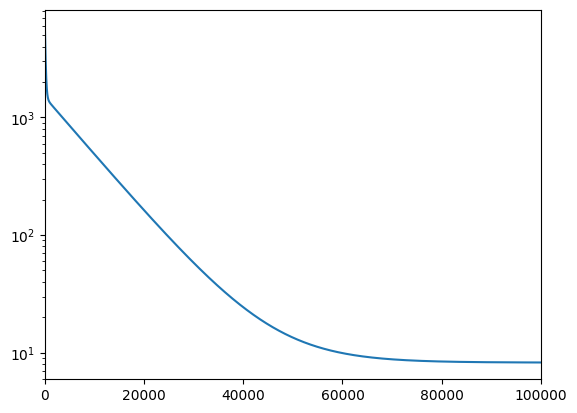

In [5]:
training_idx = np.arange(epochs+1)
# Training 상황에 대한 그래프 출력
# plt.title("'Cost / Epochs' Graph")
# plt.xlabel("Epochs")
# plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
# plt.grid(True)
plt.semilogy()
# plt.show()

## Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.26.2'

In [9]:
x_input = np.array([[1, 1], [2, 1], [1, 2], [0.5, 4], [4, 1], [2.5, 2.3]], dtype= np.float32)
labels = np.array([[0], [0], [0], [1], [1], [1]], dtype= np.float32)

n_in = x_input.shape[1]
n_out = labels.shape[1]

W = np.random.normal(size=(n_in, n_out))
B = np.random.normal(size=(n_out,))
n_in, n_out, W, B

(2,
 1,
 array([[-0.14721347],
        [-0.44600739]]),
 array([0.08801163]))

In [10]:
def Sigmoid(x):
    return 1 / (1+np.exp(-x))

def Hypothesis(x):
    return Sigmoid(np.matmul(x,W)+B)

def Cost():
    return -np.mean(labels*np.log(Hypothesis(x_input)) + (1-labels)*np.log(1-Hypothesis(x_input)))

def Gradient():
    global W, B
    pres_w = W.copy()
    grad_w = np.zeros_like(W)
    pres_b = B.copy()
    grad_b = np.zeros_like(B)
    delta = 1e-7

    for idx_r in range(W.shape[0]):
        for idx_c in range(W.shape[1]):
            W[idx_r, idx_c] = pres_w[idx_r, idx_c] + delta
            cost_p = Cost()
            W[idx_r, idx_c] = pres_w[idx_r, idx_c] - delta
            cost_m = Cost()
            grad_w[idx_r, idx_c] = (cost_p-cost_m)/(2*delta)
            W[idx_r, idx_c] = pres_w[idx_r, idx_c]

    for idx in range(B.shape[0]):
        B[idx] = pres_b[idx]+delta            
        cost_p = Cost()
        B[idx] = pres_b[idx]-delta            
        cost_m = Cost()
        grad_b[idx] = (cost_p-cost_m)/(2*delta)
        B[idx] = pres_b[idx]

    return grad_w, grad_b

In [12]:
%%time

epochs = 200000
lr = 0.01

training_idx = np.arange(epochs+1)
cost_graph = np.zeros(epochs+1)
check = np.array([0, epochs*0.01, epochs*0.08, epochs*0.2, epochs*0.4, epochs])

w_trained = []
b_trained = []
w_trained.append(W.copy())
b_trained.append(B.copy())
check_idx = 1


for cnt in range(0, epochs+1):
    cost_graph[cnt] = Cost()
    if cnt % (epochs//20) == 0:
        print("[{:>6}] cost = {:>10.4}, w = [{:>7.4}  {:>7.4}], b = {:>7.4}".format(cnt, cost_graph[cnt], W[0,0], W[1,0], B[0]))
    if check[check_idx] == cnt:
        w_trained.append(W.copy())
        b_trained.append(B.copy())
        check_idx += 1

    grad_W, grad_B = Gradient()
    W -= lr * grad_W
    B -= lr * grad_B

[     0] cost =     0.1026, w = [  2.168    2.494], b =  -8.629
[ 10000] cost =    0.07131, w = [  2.565    2.943], b =  -10.28
[ 20000] cost =    0.05455, w = [  2.856    3.273], b =   -11.5
[ 30000] cost =    0.04413, w = [  3.086    3.534], b =  -12.45
[ 40000] cost =    0.03703, w = [  3.276     3.75], b =  -13.25
[ 50000] cost =    0.03188, w = [  3.438    3.933], b =  -13.92
[ 60000] cost =    0.02799, w = [  3.578    4.093], b =  -14.51
[ 70000] cost =    0.02494, w = [  3.703    4.234], b =  -15.02
[ 80000] cost =    0.02248, w = [  3.814    4.361], b =  -15.49
[ 90000] cost =    0.02047, w = [  3.916    4.476], b =  -15.91
[100000] cost =    0.01878, w = [  4.008    4.582], b =   -16.3
[110000] cost =    0.01735, w = [  4.093    4.679], b =  -16.65
[120000] cost =    0.01612, w = [  4.172    4.768], b =  -16.98
[130000] cost =    0.01506, w = [  4.246    4.852], b =  -17.29
[140000] cost =    0.01412, w = [  4.315    4.931], b =  -17.58
[150000] cost =     0.0133, w = [   4.38

In [13]:
x_decision = np.linspace(0, 5, 5)
fig, ax = plt.subplots(2, 3, figsize=(15,11))
fig.suptitle =  ("'Hypothesis / Training Count' Graph")

for ax_idx in range(check.size):
    W = w_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision = -(W[0,0]* x_decision + B[0])/W[1,0]
    ax[ax_idx // 3, ax_idx % 3].plot(x_decision, y_decision, label='Decision Boundary', color='green')

    clr = ['bo', 'ro']
    for i in range(labels.shape[0]):
        ax[ax_idx//3, ax_idx%3].plot(x_input[i,0], x_input[i,1], clr[int(labels[i,0])])

    ax[ax_idx // 3, ax_idx % 3].set_title("Epochs : {}".format(check[ax_idx]))
    ax[ax_idx // 3, ax_idx % 3].set_xlim((0, 5))
    ax[ax_idx // 3, ax_idx % 3].set_ylim((0, 5))
    ax[ax_idx // 3, ax_idx % 3].set_xlabel("x0")
    ax[ax_idx // 3, ax_idx % 3].set_ylabel("x1")
    ax[ax_idx // 3, ax_idx % 3].grid(True)
    ax[ax_idx // 3, ax_idx % 3].legend()


plt.show()

NameError: name 'plt' is not defined